In [1]:
!pip install h5py

In [2]:
from PIL import Image

In [3]:
from tempfile import TemporaryFile

In [4]:
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def rgb(arr):
    return np.transpose(arr, (1, 2, 0))

In [21]:
class Dataset():
    def __init__(self, mat_file_path) -> None:
        self.path = mat_file_path
        self.file = h5py.File(self.path, 'r')

    def get_datasets(self):
        """
            Arguments:
                none
            Returns:
                List of all available datasets
        """
        file = self.file
        res = []
        for name in file:
            res.append(name)

        self.datasets = {i: file[i] for i in res}
        return res
    
    def get_images(self, type_ds):
        """
            Arguments:
                type_ds (str): one of 'depths', 'images', 'instances', 'labels', 'rawDepths'
                            haven't tested on others
            Returns:
                dataset array containing all data of type type_ds
        """
        ds = self.datasets[type_ds]
        arr = [np.array(i) for i in ds]

        return arr
    
    def save_to_folders(n, img_data=1, depth_data=0, instance_data=0, label_data=0, raw_depth_data = 0):
        PATHS = {
            "rgb": "../RCNN-depth-py/nyudv2/rgb/",
            "depth": "../RCNN-depth-py/nyudv2/depth/",
            "instance": "../RCNN-depth-py/nyudv2/instance/", 
            "label": "../RCNN-depth-py/nyudv2/label/",
            "raw_depth": "../RCNN-depth-py/nyudv2/raw_depth/"
        }
        if img_data:
            data = img_data[n]
            path = f"{PATHS['rgb']}{str(n)}.npy"
            with open(path, "wb") as f:
                np.save(f, data.T)
        if depth_data:
            data = img_data[n]
            path = f"{PATHS['depth']}{str(n)}.npy"
            with open(path, "wb") as f:
                np.save(f, data.T)
        if instance_data:
            data = img_data[n]
            path = f"{PATHS['instance']}{str(n)}.npy"
            with open(path, "wb") as f:
                np.save(f, data.T)
        if label_data:
            data = img_data[n]
            path = f"{PATHS['label']}{str(n)}.npy"
            with open(path, "wb") as f:
                np.save(f, data.T)
        if raw_depth_data:
            data = img_data[n]
            path = f"{PATHS['raw_depth']}{str(n)}.npy"
            with open(path, "wb") as f:
                np.save(f, data.T)

        return "gg"

In [22]:
# class_names = mat_file['sceneTypes']
# temp = np.array(class_names)[0][1]
# obj = mat_file[temp]
# print(''.join(chr(i) for i in obj[:]))

In [23]:
D = Dataset("./datasets/nyu_depth_v2_labeled.mat")
D.get_datasets()

['#refs#',
 '#subsystem#',
 'accelData',
 'depths',
 'images',
 'instances',
 'labels',
 'names',
 'namesToIds',
 'rawDepthFilenames',
 'rawDepths',
 'rawRgbFilenames',
 'sceneTypes',
 'scenes']

In [24]:
all_images = D.get_images("images")
all_depth_images = D.get_images("depths")
all_instance_images = D.get_images("instances")
all_label_images = D.get_images("labels")
all_raw_depth_images = D.get_images("rawDepths")

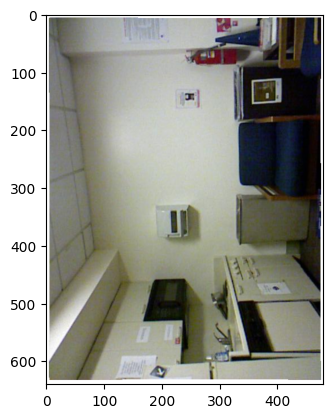

In [25]:
# normal image needs the rgb() function for correct shape
plt.imshow(rgb(all_images[0]))

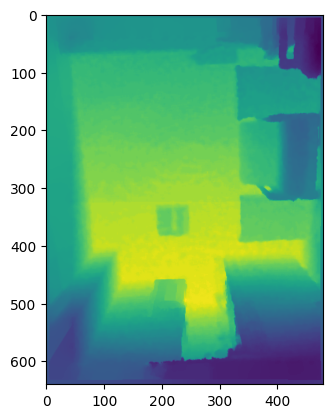

In [26]:
plt.imshow(all_depth_images[0])

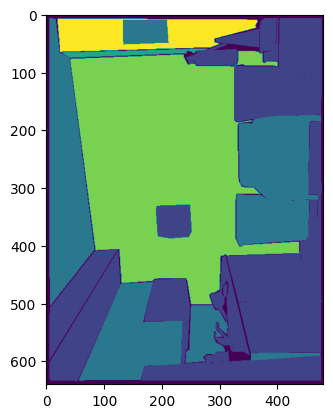

In [27]:
plt.imshow(all_instance_images[0])

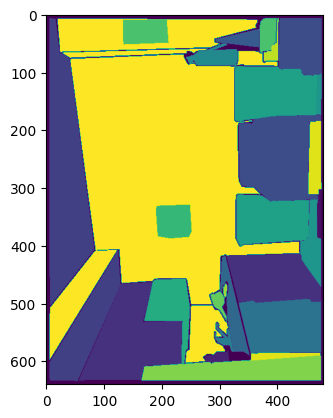

In [28]:
plt.imshow(all_label_images[0])

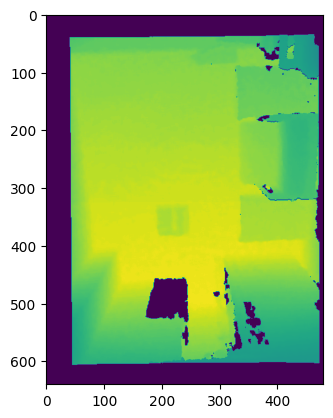

In [29]:
plt.imshow(all_raw_depth_images[0])

In [31]:
D.save_to_folders(0)

'gg'

In [16]:
!pwd

/home/deepti/Documents/CV_project/RCNN-depth-py
